In [7]:
from src.adapt_vqe import AdaptVQE
from src.data_type import AdaptData

from src.helper import pauliX, pauliToCircuit
from src.operator_pool import fermionicPool, qubitPool
from src.molecular_def import h2

import numpy as np
import matplotlib.pyplot as plt

from qiskit import (QuantumCircuit, ClassicalRegister, QuantumRegister)
from qiskit_aer import QasmSimulator

In [2]:
orbitalNumber=2
fermionic_pool = fermionicPool(orbitalNumber)
qubit_pool = qubitPool(fermionic_pool)

print(qubit_pool[10])

Pool size: 4
fermionOp: 0.5 [0^ 2] +
0.5 [1^ 3] +
-0.5 [2^ 0] +
-0.5 [3^ 1] 

qubitOp: 0.25j [X0 Z1 Y2] +
-0.25j [Y0 Z1 X2] +
0.25j [X1 Z2 Y3] +
-0.25j [Y1 Z2 X3] 

qubitOp 2: 1j [Y0 Z1 X2] 

qubitOp 2: 1j [X0 Z1 Y2] 

qubitOp 2: 1j [Y1 Z2 X3] 

qubitOp 2: 1j [X1 Z2 Y3] 

Pool Size: 4
fermionOp: -0.5 [1^ 0^ 2 1] +
0.5 [1^ 0^ 3 0] +
0.5 [2^ 1^ 1 0] +
-0.5 [3^ 0^ 1 0] 

qubitOp: -0.125j [X0 Z1 Y2] +
0.125j [X0 Y2] +
0.125j [Y0 Z1 X2] +
-0.125j [Y0 X2] +
0.125j [Z0 X1 Z2 Y3] +
-0.125j [Z0 Y1 Z2 X3] +
-0.125j [X1 Z2 Y3] +
0.125j [Y1 Z2 X3] 

qubitOp 2: 1j [Y1 Z2 X3] 

qubitOp 2: 1j [Z0 Y1 Z2 X3] 

qubitOp 2: 1j [X1 Z2 Y3] 

qubitOp 2: 1j [Z0 X1 Z2 Y3] 

qubitOp 2: 1j [Y0 Z1 X2] 

qubitOp 2: 1j [Y0 X2] 

qubitOp 2: 1j [X0 Z1 Y2] 

qubitOp 2: 1j [X0 Y2] 

Pool Size: 8
fermionOp: 0.7071067811865475 [1^ 0^ 3 2] +
-0.7071067811865475 [3^ 2^ 1 0] 

qubitOp: -0.08838834764831843j [X0 X1 X2 Y3] +
-0.08838834764831843j [X0 X1 Y2 X3] +
0.08838834764831843j [X0 Y1 X2 X3] +
-0.08838834764831843j [X0 Y

In [3]:
qubit_number = 4
circ = QuantumCircuit(qubit_number)
print(circ)

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     


In [4]:
threshold = 0.15
# backend = Aer.get_backend('qasm_simulator')
backend = QasmSimulator()
molecule = h2
maxIterations = 1

shots = 2**8

# qinstance = QuantumInstance(backend, 
#                             shots = shots,
#                             coupling_map=coupling_map,
#                             basis_gates=basis_gates,
#                             noise_model=belemNM)

myAdapt = AdaptVQE(qubit_pool,
                   molecule,
                   verbose = True,
                   threshold = threshold,
                   maxIterations = maxIterations,
                   shots = shots,
                   referenceDeterminant = None
                   )

myAdapt.prepare()

Qubit Hamiltonian: -0.09706626816763125 [] +
-0.04530261550379926 [X0 X1 Y2 Y3] +
0.04530261550379926 [X0 Y1 Y2 X3] +
0.04530261550379926 [Y0 X1 X2 Y3] +
-0.04530261550379926 [Y0 Y1 X2 X3] +
0.17141282644776926 [Z0] +
0.16868898170361205 [Z0 Z1] +
0.12062523483390411 [Z0 Z2] +
0.16592785033770338 [Z0 Z3] +
0.1714128264477692 [Z1] +
0.16592785033770338 [Z1 Z2] +
0.12062523483390411 [Z1 Z3] +
-0.22343153690813433 [Z2] +
0.17441287612261575 [Z2 Z3] +
-0.22343153690813433 [Z3]
Dict Hamiltonian: {'IIII': -0.09706626816763125, 'ZIII': 0.17141282644776926, 'IZII': 0.1714128264477692, 'IIZI': -0.22343153690813433, 'IIIZ': -0.22343153690813433, 'ZZII': 0.16868898170361205, 'ZIZI': 0.12062523483390411, 'ZIIZ': 0.16592785033770338, 'IZZI': 0.16592785033770338, 'IZIZ': 0.12062523483390411, 'IIZZ': 0.17441287612261575, 'XXYY': -0.04530261550379926, 'XYYX': 0.04530261550379926, 'YXXY': 0.04530261550379926, 'YYXX': -0.04530261550379926}
Hamiltonian List [('IIII', -0.09706626816763125), ('ZIII', 0.171

In [5]:
myAdapt.run()
data = myAdapt.data


*** Adapt Iteration 1 ***

Calculating gradients and selecting the next operator...

Non-Zero Gradients (calculated, tolerance E-5):
Operator 8: 0.36242092403039405
Operator 9: 0.36242092403039405
Operator 10: 0.36242092403039405
Operator 11: 0.36242092403039405
Operator 12: 0.36242092403039405
Operator 13: 0.36242092403039405
Operator 14: 0.36242092403039405
Operator 15: 0.36242092403039405
Total gradient norm: 1.0250811721031448
Selected: 1j [X0 X1 Y2 X3], index 8
(gradient: 0.36242092403039405)

Optimizing energy with indices [8]...
Number of function evaluations: 15
Optimized energy:  -1.1372837775073963
Optimized coefficients:  [0.11259531250000002]
Energy Change:  -0.020524470110970583
Performance ratio:  0.056631581539837696

Current average performance ratio:  0.056631581539837696
Current 10-last average performance ratio:  0.056631581539837696
Current average performance ratio of the ansatz:  0.056631581539837696
Current ansatz: [1j [X0 X1 Y2 X3]]

Energy Changes Associated w

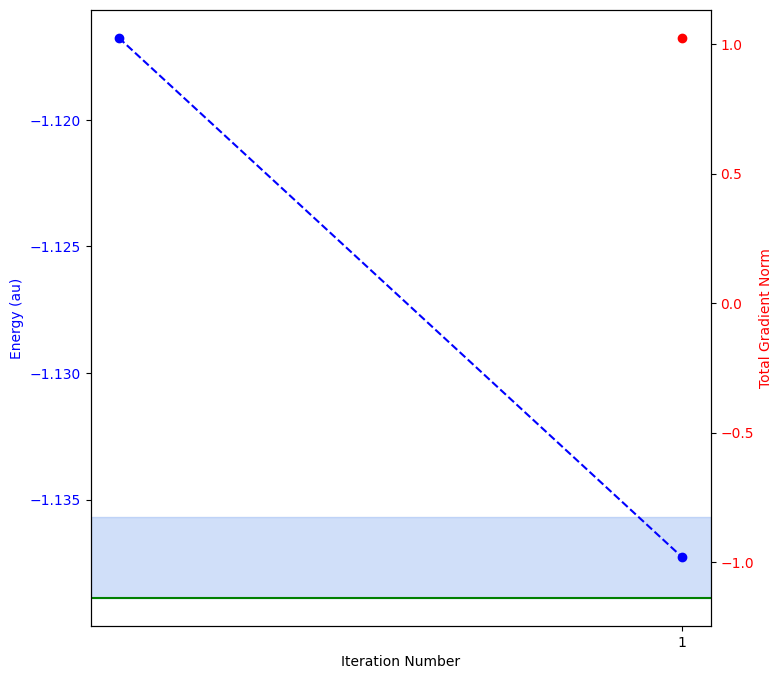

In [8]:
data.plot()
plt.axhline(-1.13728, color='green')

In [9]:
evolution = myAdapt.optEvolution
evolution

{'nfev': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'parameters': [[0.0],
  [0.1],
  [0.2],
  [0.15000000000000002],
  [0.07500000000000001],
  [0.11250000000000002],
  [0.12500000000000003],
  [0.11875000000000002],
  [0.10937500000000001],
  [0.11406250000000001],
  [0.11171875000000002],
  [0.11289062500000002],
  [0.11328125000000003],
  [0.11269531250000002],
  [0.11259531250000002]],
 'energy': [-1.1167593073964248,
  -1.1370190698544886,
  -1.1249887419896099,
  -1.135040389547473,
  -1.1349717072576209,
  -1.1372837048624878,
  -1.1370419830414509,
  -1.1372261365306413,
  -1.1372650160108253,
  -1.1372811809679761,
  -1.1372819997216022,
  -1.1372838156608824,
  -1.13728343194439,
  -1.1372838220760493,
  -1.1372837775073945],
 'stddev': [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]}

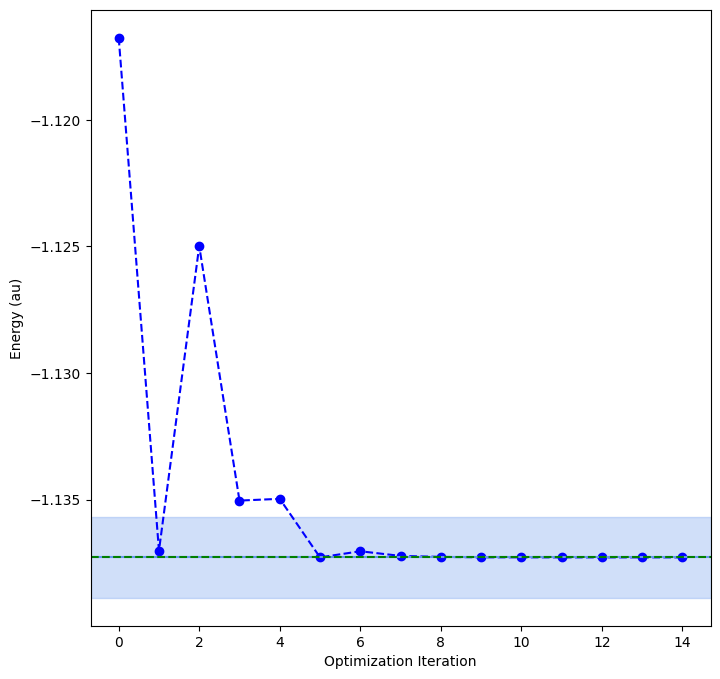

In [11]:
chemicalAccuracy = 1.5936*10**-3
exactEnergy = molecule.fci_energy


nfev = evolution["nfev"][-1]
energies = []
for i in range(nfev):
  optimizedCoefficients = list(evolution["parameters"][i])
  energy = myAdapt.calculateEnergy(optimizedCoefficients,data.result["indices"])
  energies.append(energy)

fig, ax1 = plt.subplots(figsize=[8,8])

nfev = evolution["nfev"][-1]


color1 = 'b'
ax1.plot(range(nfev), energies, '--o', color = color1)
ax1.set_xlabel("Optimization Iteration")
ax1.set_ylabel("Energy (au)")

# UCCSD graph scale
#ax1.set_ylim(-1.15,-0.05)


minAccuracy = exactEnergy - chemicalAccuracy
maxAccuracy = exactEnergy + chemicalAccuracy
l = ax1.axhspan(minAccuracy, maxAccuracy, alpha=0.3, color = 'cornflowerblue')
plt.axhline(y = exactEnergy, color = 'cornflowerblue' , linestyle = '-')
plt.axhline(-1.13728, color='green', linestyle='--')